In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from utils import equal_length_binary

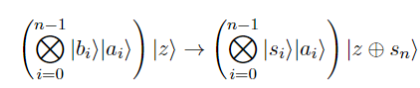
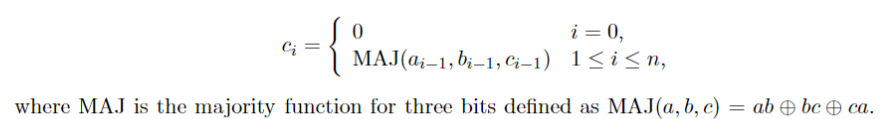
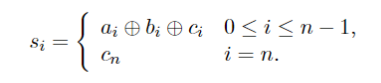

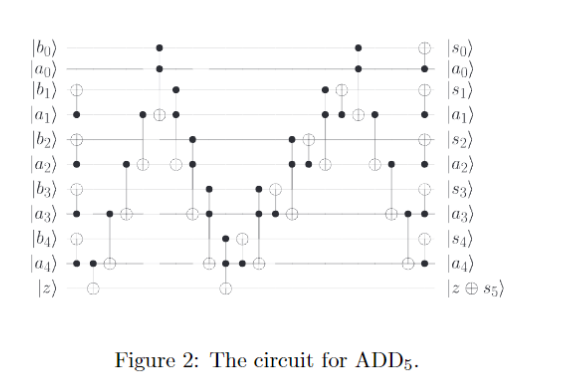

In [3]:
def create_circuit(n):    
    # Create quantum registers: 2n for the two numbers and 1 for the carry bit
    qr = QuantumRegister((2 * n) + 1)
    cr = ClassicalRegister(n + 1)
    
    # Create a classical register for the output
    circ = QuantumCircuit(qr, cr)
    
    return circ, qr, cr

In [10]:
def prepare_state(x_binary, y_binary, n, circ):  
    N = 2 * n + 1
    encode_circ = QuantumCircuit(N - 1, name='ENC')
    for i in range(n):
        if x_binary[i] == '1':
            encode_circ.x(2 * i)
        if y_binary[i] == '1':
            encode_circ.x((2 * i) + 1)
    
    circ.append(encode_circ.to_instruction(), list(range(N - 1)))
        
    return circ

In [64]:
def add_circuit(circ: QuantumCircuit, n):
    N = 2 * n + 1

    """
    Step 1:
    For i = 1, . . . , n − 1:
        Apply a CNOT gate to a pair of memory locations Bi and Ai where Ai is used for the control
        qubit.
    """         
    
    for i in range(1, n):
        #print(f"control={(2*i) + 1}, target={2*i}")
        circ.cx((2 * i) + 1, 2 * i)
    
    """
    Step 2:
    For i = n − 1, . . . , 1:
        Apply a CNOT gate to a pair of memory locations Ai and Ai+1 where Ai is used for the
        control qubit.
    """
    circ.cx(N - 2, N - 1)
    for i in reversed(range(1, n - 1)):
        circ.cx((2 * i) + 1, (2 * (i + 1)) + 1)
    
    """
    Step 3:
    For i = 0, . . . , n − 1:
        Apply a Toffoli gate to a tuple of memory locations Bi, Ai and Ai+1, where Bi and Ai are
        used for the control qubit.
    """

    for i in range(n - 1):
        circ.toffoli(2 * i, (2 * i) + 1, 2 * (i + 1) + 1)
    circ.toffoli(N - 2, N - 3, N - 1)

    """
    Step 4:
    For i = n − 1, . . . , 1:
        Apply a CNOT gate to a pair of memory locations Bi and Ai where Ai is used for the control
        qubit. Then, apply a Toffoli gate to a tuple of memory locations Bi−1, Ai−1 and Ai, where
        Bi−1 and Ai−1 are used for the control qubit.
    """
    for i in range(n-1, 0, -1):
        circ.cx((2 * i) + 1, 2 * i)
        circ.toffoli(2 * (i - 1), (2 * i) - 1 , (2 * i) + 1) 
    """
    

    Step 5:
    For i = 1, . . . , n − 2:
        Apply a CNOT gate to a pair of memory locations Ai and Ai+1 where Ai is used for the
        control qubit
    """
    for i in range(1, n - 1):
        circ.cx((2 * i) + 1, 2 * (i + 1) + 1)
    circ.barrier()
    """
    Step 6:
    For i = 0, . . . , n − 1:
        Apply a CNOT gate to a pair of memory locations Bi and Ai where Ai is used for the control
        qubit.
    """
    for i in range(n):
        circ.cx((2 * i) + 1, 2 * i)
        
    return circ

In [ ]:
def INIT(circ, n):
    N = 2 * n + 1
    """
    Step 1:
    For i = 1, . . . , n − 1:
        Apply a CNOT gate to a pair of memory locations Bi and Ai where Ai is used for the control
        qubit.
    """         
    
    for i in range(1, n):
        #print(f"control={(2*i) + 1}, target={2*i}")
        circ.cx((2 * i) + 1, 2 * i)
    
    """
    Step 2:
    For i = n − 1, . . . , 1:
        Apply a CNOT gate to a pair of memory locations Ai and Ai+1 where Ai is used for the
        control qubit.
    """
    circ.cx(N - 2, N - 1)
    for i in reversed(range(1, n - 1)):
        circ.cx((2 * i) + 1, (2 * (i + 1)) + 1)
    
    """
    Step 3:
    For i = 0, . . . , n − 1:
        Apply a Toffoli gate to a tuple of memory locations Bi, Ai and Ai+1, where Bi and Ai are
        used for the control qubit.
    """

    for i in range(n - 1):
        circ.toffoli(2 * i, (2 * i) + 1, 2 * (i + 1) + 1)
    circ.toffoli(N - 2, N - 3, N - 1)
    circ.cx(1, 0)

In [51]:
def quantum_addition(x, y):
    # Int to bin
    x_binary, y_binary, n = equal_length_binary(x, y)
    
    # Build the circuit
    circ, _, creg = create_circuit(n)
    
    # Encode integer into quantum information
    circ = prepare_state(x_binary, y_binary, n, circ)
    
    # Append add circuit to the final circuit
    circ = add_circuit(circ, n)
    
    # Define qubits to be measured
    measured_qubits = [2 * i for i in range(n)]
    measured_qubits.append(2 * n)
    circ.measure(measured_qubits, creg) 

    # Simulate and get result
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circ, simulator).result()
    counts = result.get_counts(circ)
    binstr = list(counts.keys())[0]
    int_result = int(binstr, base=2)

    return int_result, circ

10000 01000


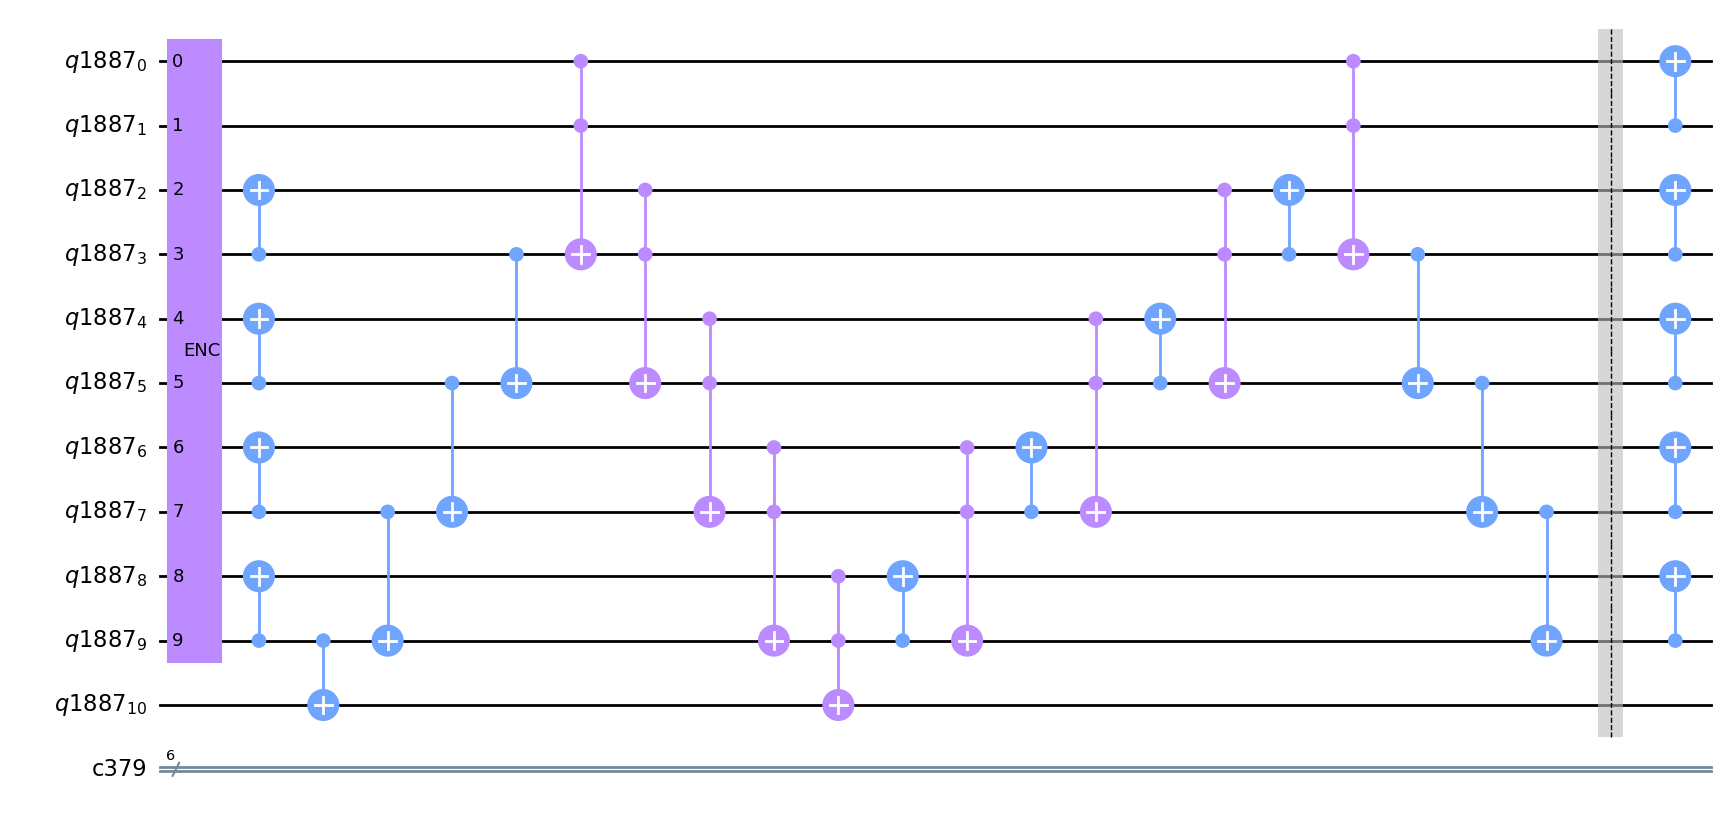

In [62]:
x, y = 16, 8
# Int to bin
x_binary, y_binary, n = equal_length_binary(x, y)

print(x_binary, y_binary)
# Build the circuit
circ, _, creg = create_circuit(n)

# Encode integer into quantum information
circ = prepare_state(x_binary, y_binary, n, circ)

# Append add circuit to the final circuit
circ = add_circuit(circ, n)
circ.draw('mpl')


In [63]:
# Define qubits to be measured
measured_qubits = [2 * i for i in range(n)]
measured_qubits.append(2 * n)
circ.measure(measured_qubits, creg) 
# Simulate and get result
simulator = Aer.get_backend('qasm_simulator')
result = execute(circ, simulator).result()
counts = result.get_counts(circ)
print(counts)
binstr = list(counts.keys())[0]

carry = binstr[0]
sum = list(reversed(binstr[1:]))
print(sum)

int_result = int(binstr, base=2)
print(int_result)

{'000011': 1024}
['1', '1', '0', '0', '0']
3


In [24]:
good_guess = 0
for i in range(10):
    for j in range(10):
        expected = i + j
        res = quantum_addition(i, j)
        print(res)
        if expected == res:
            good_guess += 1
print(f"good_guess : {good_guess / 100}")

(0, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f3a5008a170>)
(3, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f3a5023a9e0>)
(1, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f3a5008a170>)
(3, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f3a5078fa90>)
(1, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f3a5008a170>)
(5, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f3a508c71c0>)
(3, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f3a5008a170>)
(7, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f3a50647670>)
(1, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f3a5008a170>)
(9, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f3a50a97d30>)
(1, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f3a500888b0>)
(0, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f3a50a97d30>)
(3, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f3a500888b0>)

An unbounded fan-out gate on n + 1 qubits copies a classical source bit into n copies

a =  10000
b =  10000
{'000001': 1024}


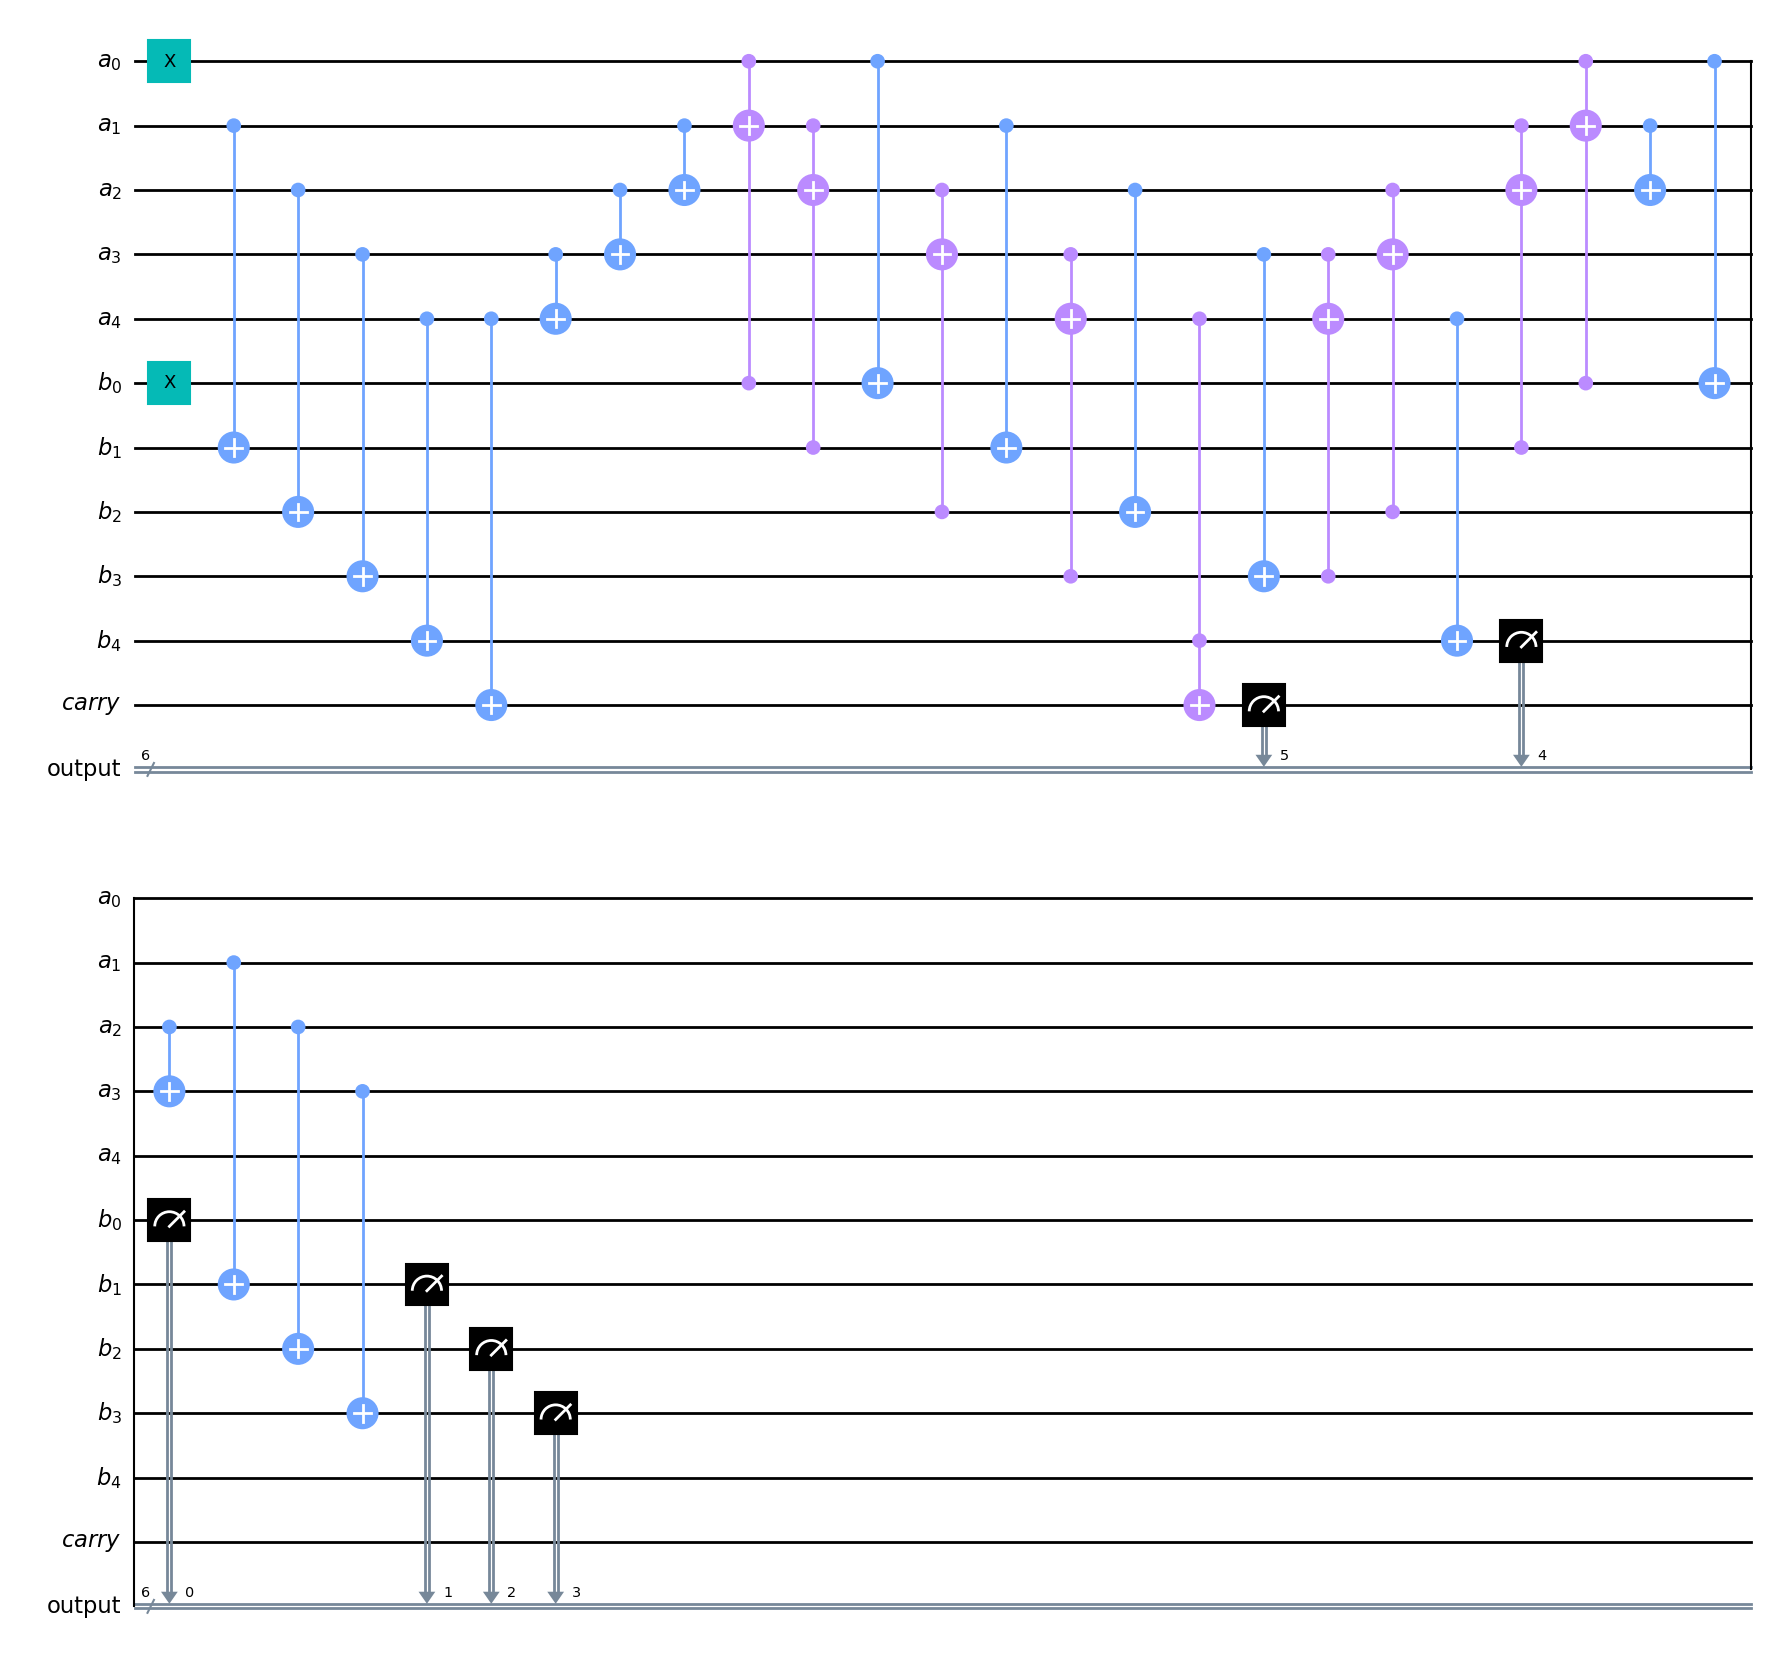

In [8]:
def create_ripple_carry_adder(circ):
    # no ancillary qubits
    # size = 7*n - 6
    
    
    # Encode bits in the circuit
    for i in range(n):
        if x_binary[i] == '1':
            circuit.x(b[i])
        if y_binary[i] == '1':
            circuit.x(a[i])
    
    
    
    
    for i in range(1, n):
        circuit.cnot(a[i], b[i])
    
    circuit.cnot(a[n - 1], c)
    
    for j in range(n - 2, 0, -1):
        circuit.cnot(a[j], a[j + 1])
    
    for i in range(0, n - 1):
        circuit.ccx(b[i], a[i], a[i + 1])
        
    circuit.ccx(b[n - 1], a[n - 1], c)

    for k in range(n - 2, -1 ,-1):
        circuit.cnot(a[k], b[k])
        circuit.ccx(b[k], a[k], a[k + 1])
        
    for j in range(1, n - 2):
        circuit.cnot(a[j], a[j + 1])
    
    for i in range(0, n):
        circuit.cnot(a[i], b[i])
    

    # Measure the second register (b) to get the output
    simulator = Aer.get_backend('qasm_simulator')
    #circuit.measure(b, output)
    circuit.measure(b, output[0:n])
    circuit.measure(c, output[n]) 
    result = execute(circuit, simulator).result()
    counts = result.get_counts(circuit)
    print(counts)
    #plot_histogram(counts)
    

    return circuit


adder_circuit = create_ripple_carry_adder(16, 16)
adder_circuit.draw('mpl')